In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
train_dir = r"C:\Users\ROSHAAN\Desktop\TensorFlow\Data\train"
val_dir = r"C:\Users\ROSHAAN\Desktop\TensorFlow\Data\test"

In [6]:
batch_size = 100
IMG_SHAPE = 150 

In [7]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 3001 images belonging to 10 classes.


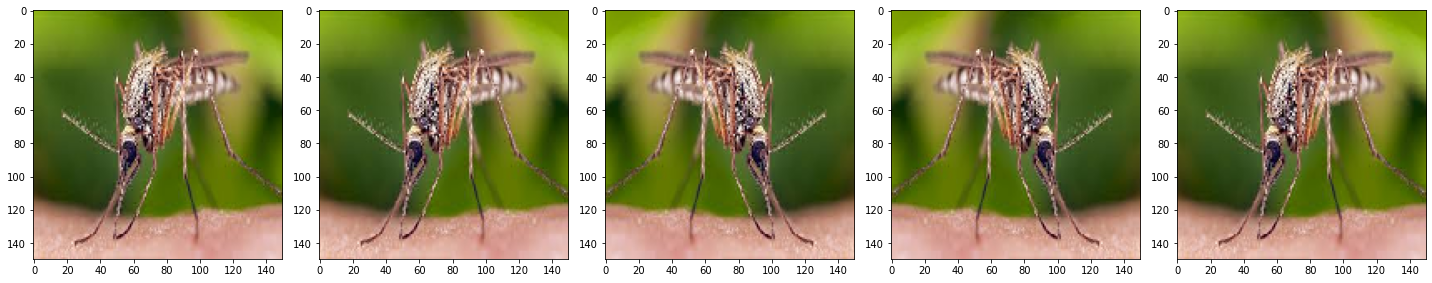

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 3001 images belonging to 10 classes.


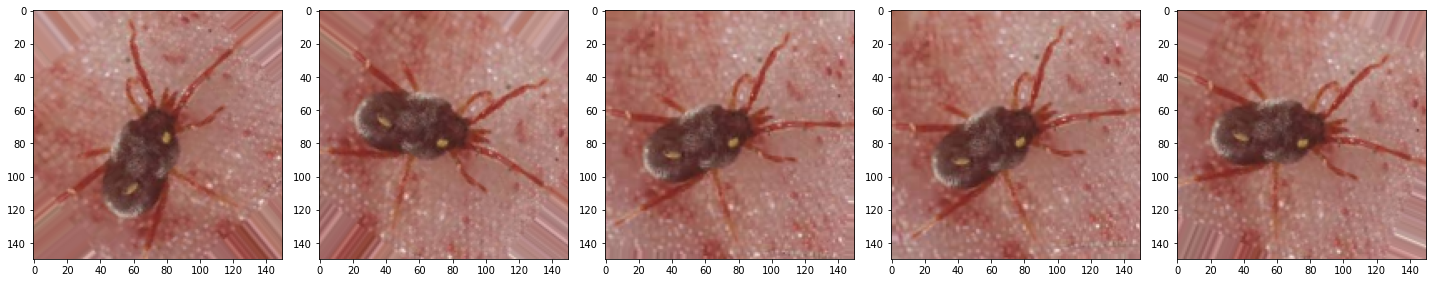

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 3001 images belonging to 10 classes.


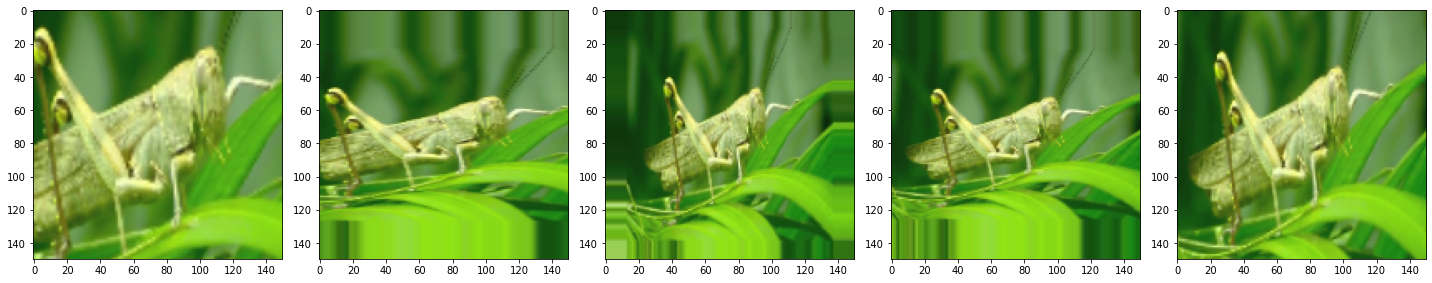

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 3001 images belonging to 10 classes.


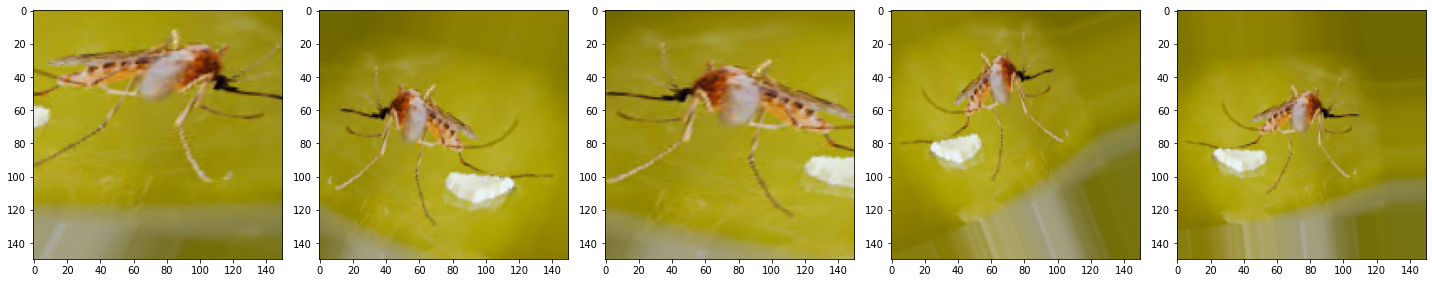

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 500 images belonging to 10 classes.


In [19]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

C:\Users\ROSHAAN\AppData\Local\Temp\ipykernel_17488\2136410573.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/80
31/31 [==============================] - 98s 3s/step - loss: 2.3289 - accuracy: 0.1446 - val_loss: 2.0739 - val_accuracy: 0.2540
Epoch 2/80
31/31 [==============================] - 85s 3s/step - loss: 2.0609 - accuracy: 0.2463 - val_loss: 1.8684 - val_accuracy: 0.3360
Epoch 3/80
31/31 [==============================] - 92s 3s/step - loss: 2.0023 - accuracy: 0.2832 - val_loss: 1.7796 - val_accuracy: 0.3640
Epoch 4/80
31/31 [==============================] - 96s 3s/step - loss: 1.8634 - accuracy: 0.3379 - val_loss: 1.7245 - val_accuracy: 0.3560
Epoch 5/80
31/31 [==============================] - 95s 3s/step - loss: 1.8210 - accuracy: 0.3496 - val_loss: 1.6064 - val_accuracy: 0.4200
Epoch 6/80
31/31 [==============================] - 96s 3s/step - loss: 1.7508 - accuracy: 0.3769 - val_loss: 1.6653 - val_accuracy: 0.4000
Epoch 7/80
31/31 [==============================] - 90s 3s/step - loss: 1.7310 - accuracy: 0.3892 - val_loss: 1.6025 - val_accuracy: 0.4320
Epoch 8/80
31/31 [==

In [22]:
model.save("Trained.h5")